In [1]:
import pandas as pd

# 파일 경로
file_path = './data/jeju_card.csv'

# 데이터프레임으로 파일 읽기
df = pd.read_csv(file_path)

In [2]:
# 데이터프레임 탐색
df.head()

,시도명,시군구명,지역구분,업종명,이용자 구분,연령대,성별,연월,이용자수,이용횟수,이용금액
0,제주도,제주시,읍면,유흥,제주도민,60대이상,여,2018-12,23,29,4240100
1,제주도,제주시,읍면,유흥,제주도민,60대이상,남,2018-12,114,190,27414000
2,제주도,제주시,읍면,유흥,제주도민,50대,여,2018-12,52,71,6848000
3,제주도,제주시,읍면,유흥,제주도민,50대,남,2018-12,259,458,91468500
4,제주도,제주시,읍면,유흥,제주도민,40대,여,2018-12,77,99,10021600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     19573 non-null  object
 1   시군구명    19573 non-null  object
 2   지역구분    19573 non-null  object
 3   업종명     19573 non-null  object
 4   이용자 구분  19573 non-null  object
 5   연령대     19573 non-null  object
 6   성별      19573 non-null  object
 7   연월      19573 non-null  object
 8   이용자수    19573 non-null  int64 
 9   이용횟수    19573 non-null  int64 
 10  이용금액    19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [4]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 19573
Number of columns: 11


In [5]:
df.describe()

,이용자수,이용횟수,이용금액
count,19573.000000,19573.000000,1.957300e+04
mean,2987.681347,5980.462525,2.100849e+08
std,5331.172895,13623.951410,3.921408e+08
min,1.000000,1.000000,1.000000e+03
25%,254.000000,371.000000,1.765947e+07
50%,972.000000,1376.000000,7.142090e+07
75%,3169.000000,5710.000000,2.169743e+08
max,40329.000000,149274.000000,3.213235e+09


In [6]:
df.isnull().sum()

시도명       0
시군구명      0
지역구분      0
업종명       0
이용자 구분    0
연령대       0
성별        0
연월        0
이용자수      0
이용횟수      0
이용금액      0
dtype: int64

In [7]:
df.nunique()

시도명           1
시군구명          2
지역구분          2
업종명           8
이용자 구분        2
연령대           7
성별            2
연월           28
이용자수       6779
이용횟수       8321
이용금액      19429
dtype: int64

In [8]:
df_2017_2018 = df[df['연월'].str.startswith(('2017', '2018'))]

In [9]:
df_2017_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16707 entries, 0 to 16706
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도명     16707 non-null  object
 1   시군구명    16707 non-null  object
 2   지역구분    16707 non-null  object
 3   업종명     16707 non-null  object
 4   이용자 구분  16707 non-null  object
 5   연령대     16707 non-null  object
 6   성별      16707 non-null  object
 7   연월      16707 non-null  object
 8   이용자수    16707 non-null  int64 
 9   이용횟수    16707 non-null  int64 
 10  이용금액    16707 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.5+ MB


In [10]:
df_2017_2018.describe()

,이용자수,이용횟수,이용금액
count,16707.000000,16707.000000,1.670700e+04
mean,3008.829473,6037.831747,2.093024e+08
std,5360.720486,13750.702230,3.885182e+08
min,1.000000,1.000000,1.000000e+03
25%,249.000000,366.500000,1.719695e+07
50%,984.000000,1392.000000,7.162195e+07
75%,3215.500000,5808.500000,2.179713e+08
max,40329.000000,149274.000000,3.183193e+09


In [11]:
df_2017_2018.nunique()

시도명           1
시군구명          2
지역구분          2
업종명           8
이용자 구분        2
연령대           7
성별            2
연월           24
이용자수       6247
이용횟수       7546
이용금액      16579
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Filter the dataframe for 2017 and 2018 data
df_2017 = df_2017_2018[df_2017_2018['연월'].str.contains('2017')]
df_2018 = df_2017_2018[df_2017_2018['연월'].str.contains('2018')]

In [23]:
def ShowCompare(first, second, title):
    df_2017_grouped = df_2017.groupby(first)[second].sum()
    df_2018_grouped = df_2018.groupby(first)[second].sum()

    # 한글 폰트 설정
    #font_path = 'C:\\WINDOWS\\Fonts\\GOTHIC.TTF'  
    font_path = './NanumGothic.ttf'
    fontprop = fm.FontProperties(fname=font_path, size=10)

    plt.plot(df_2017_grouped.index, df_2017_grouped.values, label='2017')
    plt.plot(df_2018_grouped.index, df_2018_grouped.values, label='2018')

    plt.xlabel('Month', fontproperties=fontprop)
    plt.ylabel('Total ' + second, fontproperties=fontprop)
    plt.title(title, fontproperties=fontprop)
    plt.legend()
    plt.xticks(rotation=45, fontsize=8)
    plt.show()

z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


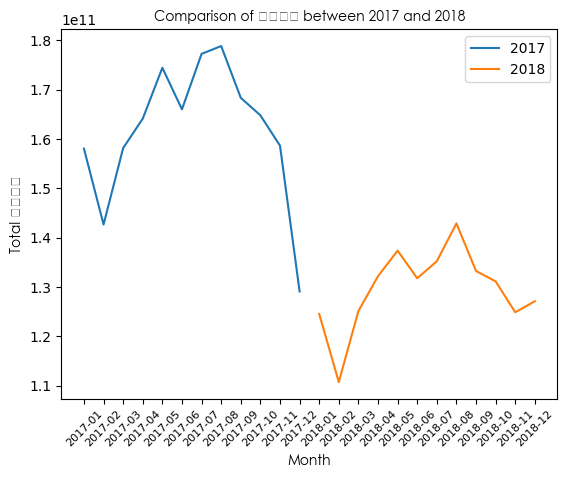

z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


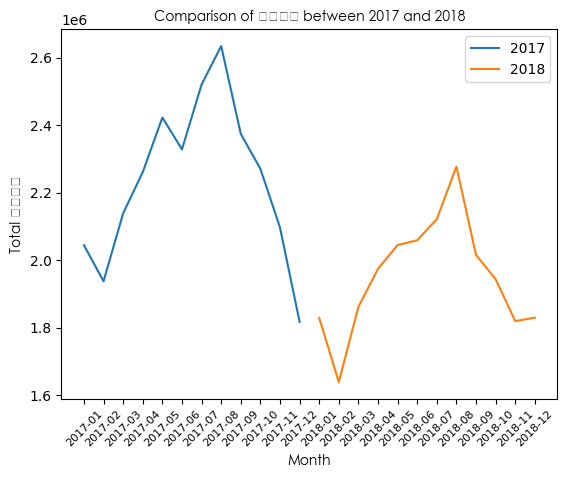

z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
z:\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


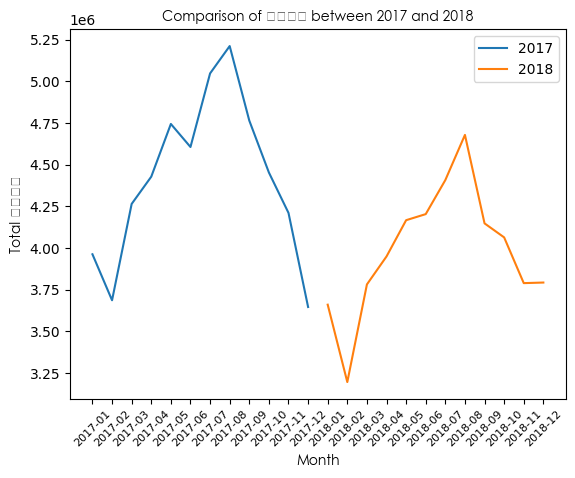

In [24]:
ShowCompare('연월', '이용금액', 'Comparison of 이용금액 between 2017 and 2018')
ShowCompare('연월', '이용자수', 'Comparison of 이용자수 between 2017 and 2018')
ShowCompare('연월', '이용횟수', 'Comparison of 이용횟수 between 2017 and 2018')